In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
%load_ext autoreload
%autoreload 2
%run '../../main.py'

In [12]:
dataSetOps = DataSetOps()

mul = 10000

dataSetOps.import_years(2015, 2017)
dataSetOps.df['max'] = dataSetOps.df['max'] * mul
dataSetOps.df['min'] = dataSetOps.df['min'] * mul
dataSetOps.df['open'] = dataSetOps.df['open'] * mul
dataSetOps.df['price'] = dataSetOps.df['price'] * mul

dataSetOps.prepare()


df = dataSetOps.df

In [13]:
# print(df)
# variables
mavglar = [30, 50, 70]
window = 15
spread = 1.5
epilson = spread * mul / 10000

In [14]:
df['value'] = True
for mavgl in mavglar:
    mavgl = str(mavgl)
    df['f_mavg' + mavgl] = df['mavg' + mavgl].shift(-window).rolling(window=50).mean()
    df['value'] = df['value'] & (df['f_mavg' + mavgl] - df['mavg' + mavgl] > epilson)
    #df[['price', 'mavg' + mavgl, 'mavg10', 'f_mavg' + mavgl]].head(1000).plot()
    
    
df['f_price'] = df['price'].shift(-window).rolling(window=window).max()
df['value_real'] = df['f_price'] - df['price'] > epilson

pattern prob 13.59120467187773 %
pattern total prob 8.086571595566536 %
1115516


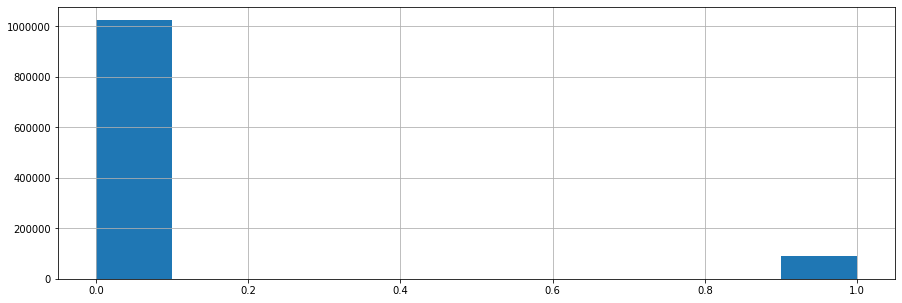

In [15]:
df['value'].astype(int).hist()
print('pattern prob', (len(df[df['value']]) / (len(df[df['value_real']]))) * 100, '%')
print('pattern total prob', (len(df[df['value']]) / (len(df))) * 100, '%')
print(len(df))

In [17]:
X = df[['price', 'mavg10', 'mavg20', 'mavg50', 'mavg80', 'mavg100', 'mavg1000']]
Y = df['value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
import keras
import tensorflow as tf


config = tf.ConfigProto() 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

    
#Initializing Neural Network
classifier = Sequential()

class1 = Dense(output_dim = 256, init = 'uniform', activation = 'relu', input_dim = 7)
class2 = Dense(output_dim = 256, init = 'uniform', activation = 'relu')

class3 = Dense(output_dim = 64, init = 'uniform', activation = 'relu')
# Adding the input layer and the first hidden layer
classifier.add(class1)
# Adding the second hidden layer
classifier.add(class2)

classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'sigmoid'))

classifier.add(class3)
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
from keras import metrics
metric_names = [metrics.mae, 'accuracy']
classifier.compile(optimizer='adam', loss = 'mean_squared_error', metrics=metric_names)


# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 20, epochs = 700)
import random
classifier.save("/tmp/mavg_classifier_" + str(random.randint(100000, 999999)))

/home/taleh/anaconda3/envs/tf_gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=256, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/taleh/anaconda3/envs/tf_gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/taleh/anaconda3/envs/tf_gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  del sys.path[0]
/home/taleh/anaconda3/envs/tf_gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=64, kernel_initializer="uniform

Epoch 1/700
 984240/1003964 [============================>.] - ETA: 1s - loss: 0.0440 - mean_absolute_error: 0.0867 - acc: 0.9437

In [ ]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
from lib.helper import AccuracyCalculator

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, (y_pred > 0.8))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_pred[:,0], y_test, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_pred[:,0], y_test)


In [ ]:
(1-risk_hist_df.risk).plot()

In [ ]:
cm

In [ ]:
dfx = df[df['value']]
p_f = len(dfx[dfx['value_real']]) / len(dfx)
p_r = cm[1,1] / (cm[1,1] + cm[0,1])
print('real prob', p_f , p_r, p_f * p_r)

In [ ]:
y_all_pred = classifier.predict(sc.transform(X))
y_f_price_real = df['value_real']
cm = confusion_matrix(y_f_price_real, (y_all_pred > 0.8))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_all_pred[:,0], y_f_price_real, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_all_pred[:,0], y_f_price_real)

print(cm)

(1-risk_hist_df.risk).plot()



In [ ]:
dfr = df[df['value']]
dfr['value_real'].astype(int).hist()
print(len(dfr[dfr['value_real']]) / (len(dfr)))
print(len(dfr['value_real']))

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.config.experimental.list_physical_devices()